## Finding Solutions to the Dual Adversary SDP

In this demonstration, we showcase the functionality of our package `quantum_query_optimizer`.

Consider the Boolean function evaluation problem. Define a Boolean function $f: S \rightarrow \{0,1\}$ where $S \subseteq \{0,1\}^n$. The goal is to evaluate $f$ on an unknown input $x \in S$ with *few* queries to the input. For example, let $f$ be the OR function so $f(x) = x_1 \lor x_2 \lor \ldots \lor x_n$. On a classical computer, the worst case query complexity is $n$ (every input needs to be checked). However, on a quantum computer, the optimal query complexity is $\sqrt{n}$. In general, finding the optimal query complexity *and* a quantum algorithm that meets this complexity is a difficult task.

Fortunately, there is an SDP formulation that can be used to find the optimal query complexity and a quantum algorithm that meets this complexity. This SDP is called the *dual adversary SDP*. We provide a Python package that solves this SDP for arbitrary Boolean functions $f$.

In [2]:
# Import the necessary packages
import quantum_query_optimizer as qqo
import numpy as np
import random

#### Example 1: Explicit Construction

We will explicitly define $E$ and $D$ and then run the ADM SDP solver to find the query complexity.

In [13]:
# f(D_i) = E_i for all i
D = ['00', '01', '10', '11']
E = ['0', '1', '1', '0'] # Try changing the function f and see how the query complexity responds.
solutions = qqo.runSDP(D=D, E=E)

n: 2
D: ['00', '01', '10', '11']
E: ['0', '1', '1', '0']
Optimal Query Complexity: 2.0
Number of Iterations: 69
Run Time: 0.118 seconds



#### Example 2: Function Construction

We will use functions to generate $E$ and $D$ and then run the ADM SDP solver to find the optimal query complexity. This method is helpful when we want to compare the query complexity for multiple values of $n$.

In [4]:
# qqo.getDAll gets all binary strings
# qqo.getEOR gets the Boolean function OR
all_solutions = qqo.runSDPForN(getD=qqo.getDAll, getE=qqo.getEOR, n_end=5, n_start=1)

n: 1
D: ['0', '1']
E: ['0', '1']
Optimal Query Complexity: 1.0
Number of Iterations: 69
Run Time: 0.087 seconds

n: 2
D: ['00', '01', '10', '11']
E: ['0', '1', '1', '1']
Optimal Query Complexity: 1.414
Number of Iterations: 73
Run Time: 0.123 seconds

n: 3
D: ['000', '001', '010', '011', '100', '101', '110', '111']
E: ['0', '1', '1', '1', '1', '1', '1', '1']
Optimal Query Complexity: 1.732
Number of Iterations: 87
Run Time: 0.729 seconds

n: 4
D: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
E: ['0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Optimal Query Complexity: 2.0
Number of Iterations: 109
Run Time: 6.08 seconds

n: 5
D: ['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '110

Now that we have these solutions, let's plot the query complexity and runtime as a function of $n$.

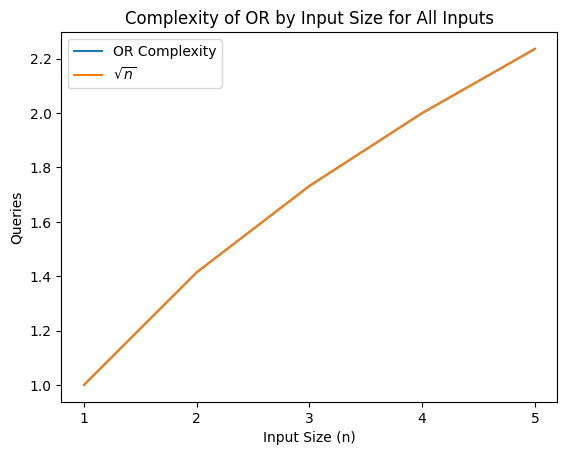

In [5]:
qqo.visualizeComplexity(all_solutions, functions=[np.sqrt], labels = ['OR Complexity', r'$\sqrt{n}$'], title="Complexity of OR by Input Size for All Inputs")

The query complexity is exactly $\sqrt{n}$. This lines up with the theoretical result that the optimal query complexity for the OR function is $\sqrt{n}$. Let's see how long it takes to find the query complexity as $n$ grows.

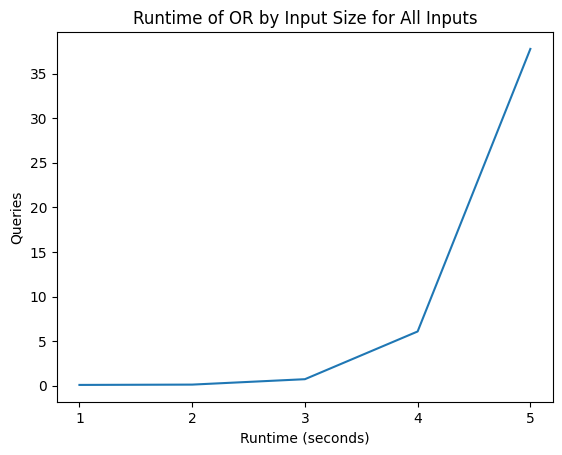

In [6]:
qqo.visualizeRuntime(all_solutions, title="Runtime of OR by Input Size for All Inputs")

Oof, not so good.

#### Example 3: Function Construction with Worst Case Inputs

Fortunately, there are many inputs that we don't need to consider if we only care about the worst case complexity of OR. In particular, we only need bitstrings with at most a single 1. Let's try only using these worst case inputs.

In [7]:
# Instead of getting all binary strings, we can get only the worst case inputs for OR
worst_solutions = qqo.runSDPForN(getD=qqo.getDWorstOR, getE=qqo.getEOR, n_end=10, n_start=1)

n: 1
D: ['0', '1']
E: ['0', '1']
Optimal Query Complexity: 1.0
Number of Iterations: 69
Run Time: 0.069 seconds

n: 2
D: ['00', '01', '10']
E: ['0', '1', '1']
Optimal Query Complexity: 1.414
Number of Iterations: 71
Run Time: 0.09 seconds

n: 3
D: ['000', '001', '010', '100']
E: ['0', '1', '1', '1']
Optimal Query Complexity: 1.732
Number of Iterations: 98
Run Time: 0.191 seconds

n: 4
D: ['0000', '0001', '0010', '0100', '1000']
E: ['0', '1', '1', '1', '1']
Optimal Query Complexity: 2.0
Number of Iterations: 117
Run Time: 0.646 seconds

n: 5
D: ['00000', '00001', '00010', '00100', '01000', '10000']
E: ['0', '1', '1', '1', '1', '1']
Optimal Query Complexity: 2.236
Number of Iterations: 136
Run Time: 1.062 seconds

n: 6
D: ['000000', '000001', '000010', '000100', '001000', '010000', '100000']
E: ['0', '1', '1', '1', '1', '1', '1']
Optimal Query Complexity: 2.45
Number of Iterations: 194
Run Time: 5.332 seconds

n: 7
D: ['0000000', '0000001', '0000010', '0000100', '0001000', '0010000', '01

When we visualize the query complexity, we see it's still $\sqrt{n}$.

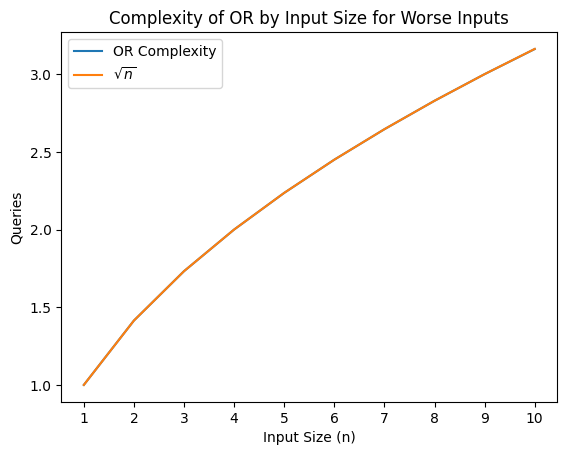

In [8]:
qqo.visualizeComplexity(worst_solutions, title="Complexity of OR by Input Size for Worse Inputs", functions=[np.sqrt], labels=['OR Complexity', r'$\sqrt{n}$'])

But the runtime is much faster and grows *maybe* less exponentially?

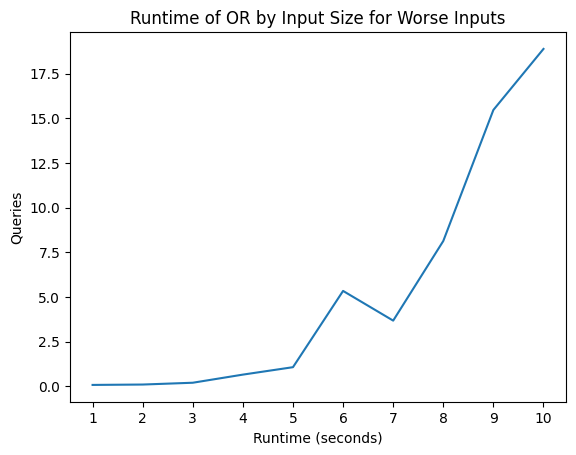

In [9]:
qqo.visualizeRuntime(worst_solutions, title="Runtime of OR by Input Size for Worse Inputs")

#### Example 4: Custom Boolean Functions
There are many functions that you may be interested in finding the complexity for. We make it easy to analzye the query complexity for your choice of function.

In [23]:
def custom_f(D):
  #return [str(x.count('1') % 2) for x in D] # parity
  #return [str(random.randint(a=0, b=1)) for x in D] # random
  return [x[0] for x in D] # first bit

In [26]:
custom_solutions = qqo.runSDPForN(getD=qqo.getDAll, getE=custom_f, n_end=4, n_start=1)

n: 1
D: ['0', '1']
E: ['0', '1']
Optimal Query Complexity: 1.0
Number of Iterations: 69
Run Time: 0.064 seconds

n: 2
D: ['00', '01', '10', '11']
E: ['0', '0', '1', '1']
Optimal Query Complexity: 1.0
Number of Iterations: 69
Run Time: 0.099 seconds

n: 3
D: ['000', '001', '010', '011', '100', '101', '110', '111']
E: ['0', '0', '0', '0', '1', '1', '1', '1']
Optimal Query Complexity: 1.0
Number of Iterations: 76
Run Time: 0.444 seconds

n: 4
D: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
E: ['0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1']
Optimal Query Complexity: 1.0
Number of Iterations: 173
Run Time: 5.89 seconds



Plotting the query complexity, we see that the optimal query complexity is $n$. This is exactly what we get if we look at all the bits.

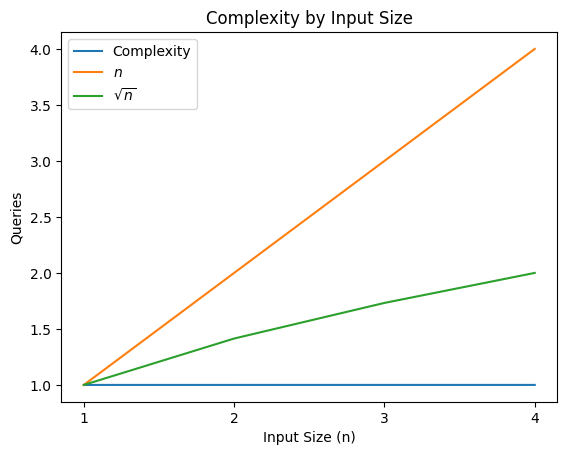

In [30]:
qqo.visualizeComplexity(custom_solutions, functions=[lambda x:x, lambda x:np.sqrt(x)], labels=['Complexity', r'$n$', r'$\sqrt{n}$'], title="Complexity by Input Size")